<a href="https://colab.research.google.com/github/sboonpan/Neural-Network_Iris-Classification/blob/main/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Preparation**

เริ่มต้นด้วยการอิมพอร์ตและโหลดข้อมูลดอก iris จากนั้นตรวจสอบข้อมูล

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



จะพบว่ามี 3 class ดังรูปด้านบน หรือเรียกว่ามี 3 label

In [38]:
df = sns.load_dataset('iris')
# df.head()
df.sample(5, random_state=1)

,sepal_length,sepal_width,petal_length,petal_width,species
14,5.8,4.0,1.2,0.2,setosa
98,5.1,2.5,3.0,1.1,versicolor
75,6.6,3.0,4.4,1.4,versicolor
16,5.4,3.9,1.3,0.4,setosa
131,7.9,3.8,6.4,2.0,virginica


ตรวจสอบให้แน่ใจว่าไม่มี NaN (งาน NN จะต้องไม่มี Missing data) ถ้ามี ข้อมูลสูญหายจะต้องจัดการกับข้อมูลสูญหายก่อนจึงจะทำในขั้นตอนต่อไปได้

In [3]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

ใช้ scatterplot ดูการกระจายของข้อมูล

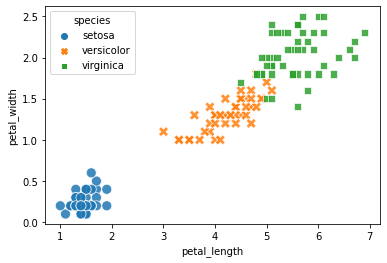

In [4]:
sns.scatterplot(x='petal_length', y='petal_width', data=df, hue='species', style='species', 
                alpha=0.85, edgecolor='w', s=100)
plt.show()

การเข้ารหัสคลาส species ให้เป็นค่าตัวเลขทำได้ 2 วิธี จะใช้ pandas factorize หรือ numpy ก็ได้(เลือกอย่างใดอย่างหนึ่ง)

In [39]:
y, class_names = pd.factorize(df.species, sort=True) 
# print(pd.unique(y))

class_names, y[45:105]

(Index(['setosa', 'versicolor', 'virginica'], dtype='object'),
 array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2]))

In [40]:
class_names, y = np.unique(df.species, return_inverse=True)
class_names, y[45:105]

(array(['setosa', 'versicolor', 'virginica'], dtype=object),
 array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2]))

จะได้ตัวแปรที่ชื่อ class_names เก็บชื่อ และตัวแปร y เก็บค่าที่เข้ารหัสแล้ว เช่น เดิม y เป็น setosa ก็จะเปลี่ยนเป็น 0 คลาส versicolor ก็เปลี่ยนเป็น 1

สร้างอินพุต Feature โดยตัดคอลัมน์ species ออกไป

In [42]:
X = df.drop('species', axis = 1)
X.sample(6, random_state = 1)

,sepal_length,sepal_width,petal_length,petal_width
14,5.8,4.0,1.2,0.2
98,5.1,2.5,3.0,1.1
75,6.6,3.0,4.4,1.4
16,5.4,3.9,1.3,0.4
131,7.9,3.8,6.4,2.0
56,6.3,3.3,4.7,1.6


## ปรับค่าข้อมูลเป็น Standard scale

In [44]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_sc = sc.fit_transform(X)
X_sc[ :5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

ทำการแบ่งเป็น Train และ Test (ใช้สัดส่วน Test 25%) แล้วตรวจสอบมิติของข้อมูล

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.25, random_state=1) #

X_train.shape, X_test.shape

((112, 4), (38, 4))

In [46]:
y_train.shape, y_test.shape 

((112,), (38,))

In [11]:
y_train[:5]

array([1, 2, 2, 0, 2])

## การเข้ารหัสของคลาส หรือ label ให้มีลักษณะเป็นค่าเลขฐานสอง(binary) เพื่อให้แต่ละ node ของ NN รับผิดชอบหรือเอาต์พุตค่าของแต่ละคลาส 

In [12]:
from tensorflow.keras.utils import to_categorical

def one_hot_encode(arr):
    categories, ids = np.unique(arr, return_inverse=True)
    return to_categorical(ids, len(categories))

y_train_1h = one_hot_encode(y_train).astype('int')
y_test_1h = one_hot_encode(y_test).astype('int')

y_test_1h[:4]

array([[1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0]])

หรือจะใช้ pandas ก็ได้


In [47]:
y_train_1h = pd.get_dummies(y_train)
y_test_1h = pd.get_dummies(y_test)
y_test_1h.head()

,0,1,2
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,0,1


In [14]:
y_test_1h[:5] 

,0,1,2
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,0,1


ตรวจสอบมิติของอินพุต เอาต์พุต

In [15]:
y_train_1h.shape, y_test_1h.shape 



((112, 3), (38, 3))

In [16]:
X_train[:4]

array([[ 0.79566902, -0.59237301,  0.47857113,  0.3957741 ],
       [ 1.03800476, -1.28296331,  1.16062026,  0.79067065],
       [ 1.15917263, -0.13197948,  0.99010798,  1.18556721],
       [-0.90068117,  1.01900435, -1.34022653, -1.18381211]])

In [17]:
y_train[:4]

array([1, 2, 2, 0])

In [18]:
y_train_1h[:4]

,0,1,2
0,0,1,0
1,0,0,1
2,0,0,1
3,1,0,0


# Model

In [19]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense 


model = Sequential()

hidden_node = 64
 
model.add(Dense(hidden_node, activation='relu', input_shape=(4,))) 

model.add(Dense(3, activation='softmax'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 515
Trainable params: 515
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.output_shape

(None, 3)

In [22]:
model.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 4),
    'dtype': 'float32',
    'name': 'dense_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 4),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense',
    'trainable': True,
    'units': 64,
    'use_bias': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'softmax',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': 

In [23]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [24]:
history = model.fit(X_train, y_train_1h, epochs=100, batch_size=8, verbose=1, validation_split=0.25) 

Epoch 1/100
11/11 [==============================] - 1s 24ms/step - loss: 1.0906 - accuracy: 0.3095 - val_loss: 1.1316 - val_accuracy: 0.2500
Epoch 2/100
11/11 [==============================] - 0s 6ms/step - loss: 0.9361 - accuracy: 0.5952 - val_loss: 1.0330 - val_accuracy: 0.5000
Epoch 3/100
11/11 [==============================] - 0s 5ms/step - loss: 0.8199 - accuracy: 0.7262 - val_loss: 0.9519 - val_accuracy: 0.5357
Epoch 4/100
11/11 [==============================] - 0s 4ms/step - loss: 0.7234 - accuracy: 0.7381 - val_loss: 0.8792 - val_accuracy: 0.5714
Epoch 5/100
11/11 [==============================] - 0s 6ms/step - loss: 0.6539 - accuracy: 0.7381 - val_loss: 0.8210 - val_accuracy: 0.5714
Epoch 6/100
11/11 [==============================] - 0s 5ms/step - loss: 0.5936 - accuracy: 0.7500 - val_loss: 0.7640 - val_accuracy: 0.6071
Epoch 7/100
11/11 [==============================] - 0s 6ms/step - loss: 0.5449 - accuracy: 0.7976 - val_loss: 0.7191 - val_accuracy: 0.6429
Epoch 8/100


In [25]:
score = model.evaluate(X_test, y_test_1h, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.06702466309070587
Test accuracy: 0.9736841917037964


In [26]:
model.metrics_names

['loss', 'accuracy']

In [27]:
y_pred = model.predict(X_test)

y_pred[:4]
y_pred[:4].round(3)

array([[1.   , 0.   , 0.   ],
       [0.085, 0.904, 0.01 ],
       [0.002, 0.976, 0.022],
       [1.   , 0.   , 0.   ]], dtype=float32)

In [28]:
y_pred_cat = np.argmax(y_pred, axis=1)
y_pred_cat[:4]

array([0, 1, 1, 0])

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred_cat, target_names=class_names))
print(confusion_matrix(y_test, y_pred_cat))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


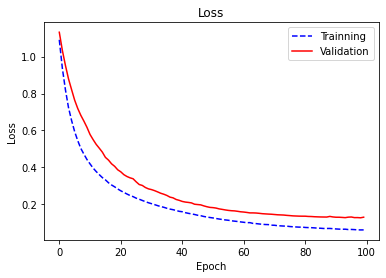

In [30]:
df_hist = pd.DataFrame.from_dict(history.history)

df_hist['loss'].plot(style='b--', label='Trainning')
df_hist['val_loss'].plot(style='r-', label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend()
plt.title('Loss')
plt.show()

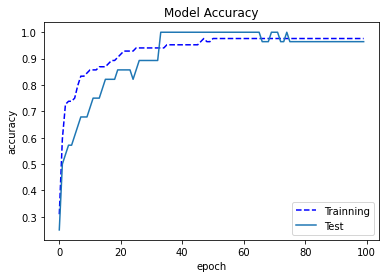

In [31]:
df_hist['accuracy'].plot(style='b--', label='Trainning')
df_hist['val_accuracy'].plot(label='Test')

plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [32]:
X_new = [[8.1, 4.0, 5.9, 2.1], # 
         [6.8, 3.6, 3.5, 1.4]] # 

# X_new = [[8.1, 4.0, 5.9, 2.1]]

X_new_sc = sc.transform(X_new)
X_new_sc

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([[ 2.73435494,  2.16998818,  1.21745768,  1.18556721],
       [ 1.15917263,  1.24920112, -0.14664056,  0.26414192]])

In [33]:
y_pred_pr = model.predict(X_new_sc)
y_pred = np.argmax(y_pred_pr, axis=1)
print(class_names[y_pred])

['versicolor' 'versicolor']


## Boundary

In [34]:
class Onehot2Int(object):
    def __init__(self, model):
        self.model = model

    def predict(self, X):
        y_pred = self.model.predict(X)
        return np.argmax(y_pred, axis=1)
    
model_no_ohe = Onehot2Int(model)    

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


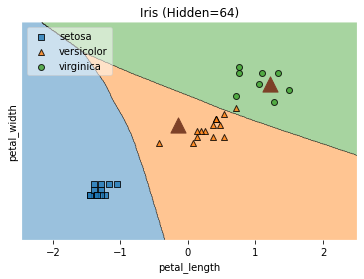

In [35]:
from mlxtend.plotting import plot_decision_regions

value = 0
width = 5.5

ax = plot_decision_regions(X_test, np.array(y_test),

                    clf=model_no_ohe, feature_index=[2, 3],  
                    filler_feature_values={0: value, 1: value},
                    filler_feature_ranges={0: width, 1: width},
                    legend=2)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_names, framealpha=0.5)

plt.title('Iris (Hidden={})'.format(hidden_node))
# plt.xticks([])
plt.yticks([])
plt.xlabel('petal_length')
plt.ylabel('petal_width')

plt.scatter(X_new_sc[:,2][y_pred==0], X_new_sc[:,3][y_pred==0], marker='s', s=180, c='b')
plt.scatter(X_new_sc[:,2][y_pred==1], X_new_sc[:,3][y_pred==1], marker='^', s=230, c='#7d4128') # 
plt.scatter(X_new_sc[:,2][y_pred==2], X_new_sc[:,3][y_pred==2], marker='o', s=150, c='b')
plt.show()